<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 162.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 156.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 159.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 150.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 157.3 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [21]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [22]:
# Get unique values and their counts in the 'Industry' column, including NA values
industry_counts = df['Industry'].value_counts(dropna=False)

# Print the unique values and their respective counts
print("Unique values in 'Industry' with their respective counts (including NA):")
print(industry_counts)

Unique values in 'Industry' with their respective counts (including NA):
Industry
NaN                                           36579
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64


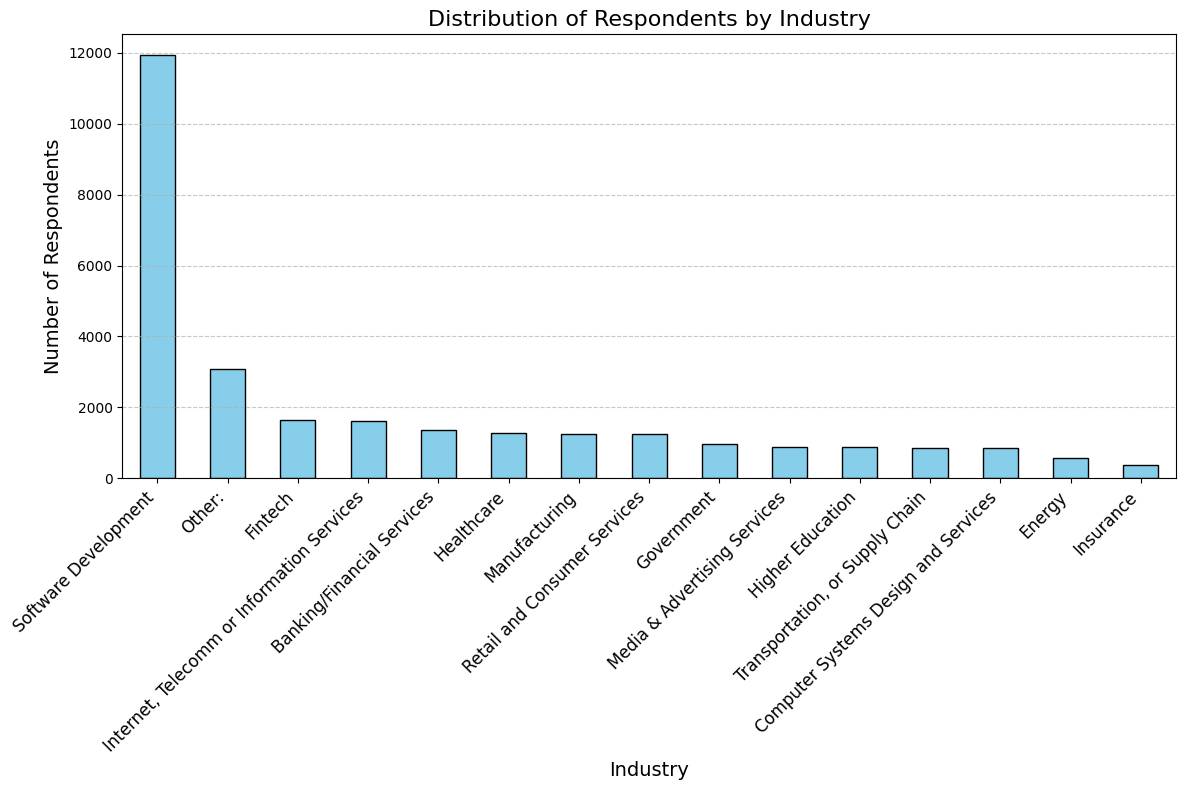

In [23]:
##Write your code here

##Write your code here

# Option to exclude NA
exclude_na = True  # Set to False to include NA

# Count unique values in the 'Industry' column
if exclude_na:
    industry_counts = df['Industry'].value_counts(dropna=True)
else:
    industry_counts = df['Industry'].value_counts(dropna=False)

# Plot bar chart
plt.figure(figsize=(12, 8))
industry_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# labels and title
plt.title('Distribution of Respondents by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [24]:
# Statistics for ConvertedCompYearly
comp_stats = df['ConvertedCompYearly'].describe()

# Count of all values
total_count = len(df['ConvertedCompYearly'])

# Count of NA values
na_count = df['ConvertedCompYearly'].isna().sum()

print(f"Total Count: {total_count}")
print(f"Count of NA values: {na_count}")
print("Statistics:")
print(comp_stats)

Total Count: 65437
Count of NA values: 42002
Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [25]:
##Write your code here

# Calculate mean and standard deviation for ConvertedCompYearly
mean_compensation = df['ConvertedCompYearly'].mean()
std_compensation = df['ConvertedCompYearly'].std()

# Threshold as 3 standard deviations above the mean
threshold = mean_compensation + 3 * std_compensation

# Identify respondents with compensation exceeding threshold
high_compensation = df[df['ConvertedCompYearly'] > threshold]

print(f"Threshold for high compensation (3 std above mean): {threshold}")
print(f"Count of respondents with high compensation: {len(high_compensation)}")
print(high_compensation[['ConvertedCompYearly']].head())

Threshold for high compensation (3 std above mean): 646426.2065215341
Count of respondents with high compensation: 89
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [26]:
##Write your code here

# Calculate Q1 and Q3 for ConvertedCompYearly (excluding NA values)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -80177.25
Upper Bound: 220860.75


Number of outliers: 978


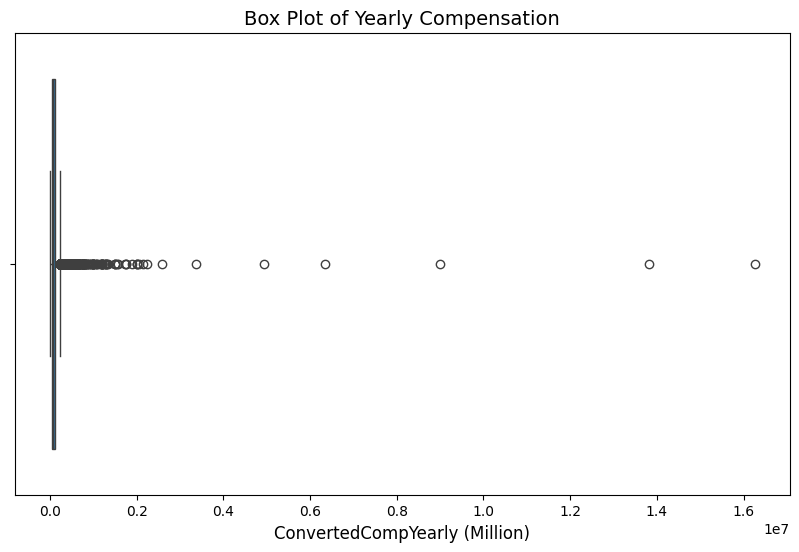

In [27]:
# Identify the outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count the number of outliers
outliers_count = len(outliers)

# Print the count of outliers
print(f"Number of outliers: {outliers_count}")

# Plot a boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'])

# Add title
plt.title('Box Plot of Yearly Compensation', fontsize=14)
plt.xlabel('ConvertedCompYearly (Million)', fontsize=12)

# Show the plot
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [28]:
# size of original DataFrame
print(f"Original DataFrame size: {df.shape}")

Original DataFrame size: (65437, 114)


In [29]:
##Write your code here

# Create new DataFrame excluding the outliers from 'ConvertedCompYearly'
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# size of the new DataFrame
print(f"New DataFrame size (without outliers): {df_no_outliers.shape}")

New DataFrame size (without outliers): (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [30]:
# unique values Age
unique_ages = df['Age'].unique()
print("Unique 'Age':")
print(unique_ages)

# unique values ConvertedCompYearly
print("Unique ConvertedCompYearly:")
print(df['ConvertedCompYearly'].unique())

# unique values JobSat
print("\nUnique 'JobSat:")
print(df['JobSat'].unique())

Unique 'Age':
['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']
Unique ConvertedCompYearly:
[    nan   7322.  30074. ...  15637.   9711. 116844.]

Unique 'JobSat:
[nan  8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


In [33]:
# Drop rows where 'ConvertedCompYearly' is NA
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Drop rows where 'JobSat' is NA
df_cleaned = df_cleaned.dropna(subset=['JobSat'])

print(df_cleaned.shape)

(16075, 114)


In [35]:
# mapping for Age bins to midpoints
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Map Age column to numeric values in the cleaned dataset
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)

# Display the unique transformed Age values
print(df_cleaned['AgeNumeric'].unique())

[21. 40. 30. 50. 60. 70. 15. nan]


In [37]:
##Write your code here

# Compute correlations between AgeNumeric, ConvertedCompYearly and JobSat
correlations = df_cleaned[['AgeNumeric', 'ConvertedCompYearly', 'JobSat']].corr()

print(correlations)

                     AgeNumeric  ConvertedCompYearly    JobSat
AgeNumeric             1.000000             0.135393  0.070583
ConvertedCompYearly    0.135393             1.000000  0.048428
JobSat                 0.070583             0.048428  1.000000


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
